In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', 
                                                  freq = 'D', 
                                                  periods = 20))
ts_lagged = ts.shift()

In [5]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Query: how can I shift my time series 'back' instead of forward?

In [122]:
# %load snippets/shift_future.py
ts_led = ts.shift(-1)

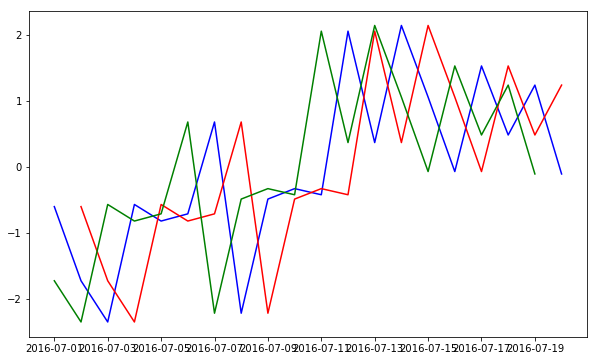

In [123]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')
plt.plot(ts_led, color = 'green')

# Window functions give you moving aggregate measures of a time series

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [13]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-05-01,1.655638,-0.764550,-1.107316
2016-05-02,0.265259,0.265952,-0.405894
2016-05-03,1.191605,1.485611,-0.349183
2016-05-04,0.162099,0.314257,-0.415168
2016-05-05,-0.719992,-0.259981,-0.512774


In [150]:
# define a rolling window to be called
r = df.rolling(window = 20)

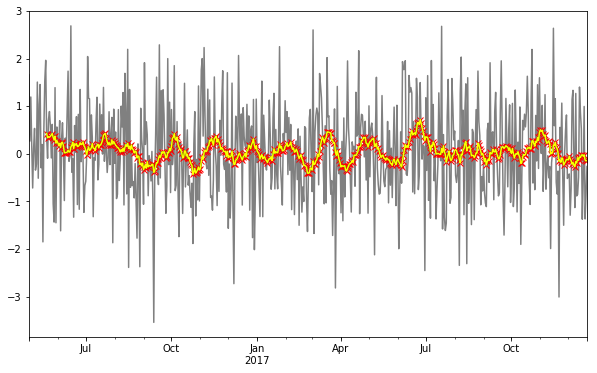

In [148]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red', marker='x')

# this is equivalent to defining r==rolling and then plot r.mean() above
df.rolling(window = 20)['A'].mean().plot(color = 'green')
# Select the column first then roll or roll first then pick a column
df['A'].rolling(window = 20).mean().plot(color = 'yellow')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

In [167]:
# 'agg' create a dataframe with a higher dimension
temp = df.rolling(window = 3).agg(['max','min','mean']).head()
temp

A                             B                      \
                 max       min      mean       max       min      mean   
2016-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2016-05-02       NaN       NaN       NaN       NaN       NaN       NaN   
2016-05-03  1.655638  0.265259  1.037500  1.485611 -0.764550  0.329004   
2016-05-04  1.191605  0.162099  0.539654  1.485611  0.265952  0.688606   
2016-05-05  1.191605 -0.719992  0.211237  1.485611 -0.259981  0.513296   

                   C                      
                 max       min      mean  
2016-05-01       NaN       NaN       NaN  
2016-05-02       NaN       NaN       NaN  
2016-05-03 -0.349183 -1.107316 -0.620797  
2016-05-04 -0.349183 -0.415168 -0.390081  
2016-05-05 -0.349183 -0.512774 -0.425708

In [166]:
# accessing data from a dataframe with higher dimensions
temp['A']['max']

2016-05-01         NaN
2016-05-02         NaN
2016-05-03    1.655638
2016-05-04    1.191605
2016-05-05    1.191605
Freq: D, Name: max, dtype: float64

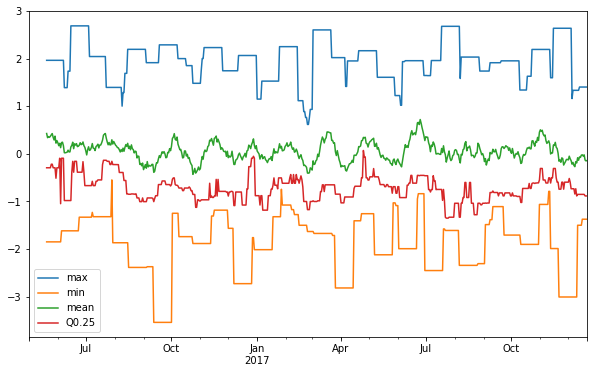

In [168]:
# create an aggreate set of data with 'agg' == 'aggregate'
df['A'].rolling(window = 20).agg(['max','min','mean']).plot()
df['A'].rolling(window = 20).quantile(0.25).plot(label='Q0.25')
plt.legend()

### What about a custom function?

In [61]:
df[0:9]

,A,B,C
2016-05-01,1.655638,-0.764550,-1.107316
2016-05-02,0.265259,0.265952,-0.405894
2016-05-03,1.191605,1.485611,-0.349183
2016-05-04,0.162099,0.314257,-0.415168
2016-05-05,-0.719992,-0.259981,-0.512774
2016-05-06,0.113776,-0.767862,0.156423
2016-05-07,0.531761,0.579321,-1.305855
2016-05-08,-0.344412,1.058263,0.133515
2016-05-09,-0.220242,0.741632,2.101841


In [62]:
# shift the dataframe with moving average
df.rolling(window = 5, center = False).apply(lambda x: x[0])[0:9]

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,1.655638,-0.764550,-1.107316
2016-05-06,0.265259,0.265952,-0.405894
2016-05-07,1.191605,1.485611,-0.349183
2016-05-08,0.162099,0.314257,-0.415168
2016-05-09,-0.719992,-0.259981,-0.512774


In [63]:
# %load snippets/custom_rolling.py
# shift the dataframe and performation a division
df.rolling(window = 5, center = False).apply(lambda x: x[0]/x[1])[0:9]

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,6.241596,-2.874767,2.728094
2016-05-06,0.222606,0.179019,1.162410
2016-05-07,7.351086,4.727377,0.841064
2016-05-08,-0.225140,-1.208770,0.809651
2016-05-09,-6.328172,0.338577,-3.278133


### What if I want to generate a rolling window function of monthly data from daily data?

In [70]:
ts_long.head()

2016-07-01   -0.320736
2016-07-02    0.707100
2016-07-03    0.919392
2016-07-04    1.063832
2016-07-05   -1.469313
Freq: D, dtype: float64

In [73]:
ts_long.resample('M').apply(lambda x: len(x))

2016-07-31    31.0
2016-08-31    31.0
2016-09-30    30.0
2016-10-31    31.0
2016-11-30    30.0
2016-12-31    31.0
2017-01-31    16.0
Freq: M, dtype: float64

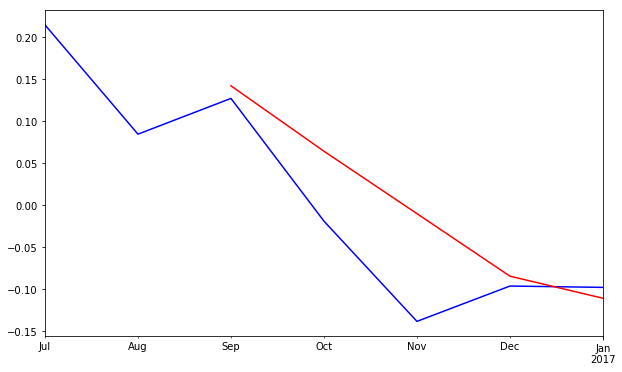

In [74]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().plot(color='blue')
ts_long.resample('M').mean().rolling(window = 3).mean().plot(color='red')

## Expanding windows

In [77]:
df.head()

,A,B,C
2016-05-01,1.655638,-0.764550,-1.107316
2016-05-02,0.265259,0.265952,-0.405894
2016-05-03,1.191605,1.485611,-0.349183
2016-05-04,0.162099,0.314257,-0.415168
2016-05-05,-0.719992,-0.259981,-0.512774


In [86]:
# expanding == increasing the window along a series/dataframe
df.expanding(min_periods = 1).sum()[0:5]

,A,B,C
2016-05-01,1.655638,-0.764550,-1.107316
2016-05-02,1.920897,-0.498598,-1.513210
2016-05-03,3.112501,0.987013,-1.862392
2016-05-04,3.274600,1.301270,-2.277560
2016-05-05,2.554608,1.041289,-2.790334


In [87]:
df.expanding(min_periods = 1).mean()[0:5]

,A,B,C
2016-05-01,1.655638,-0.764550,-1.107316
2016-05-02,0.960448,-0.249299,-0.756605
2016-05-03,1.037500,0.329004,-0.620797
2016-05-04,0.818650,0.325317,-0.569390
2016-05-05,0.510922,0.208258,-0.558067


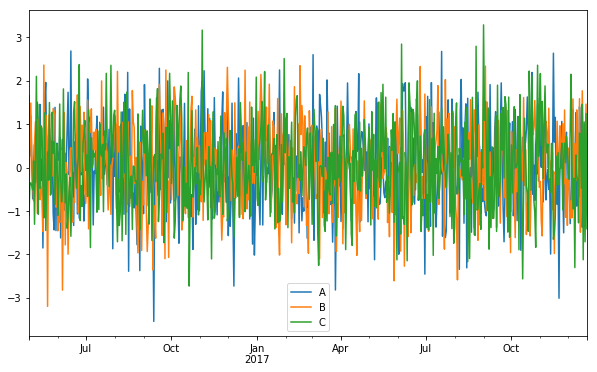

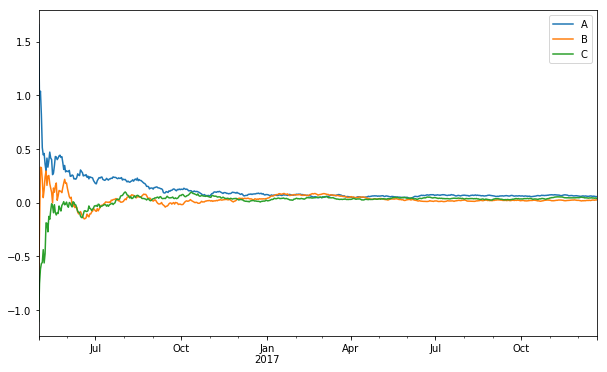

In [90]:
df.plot()
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [ ]:
# %load snippets/window_funcs_try.py